## Parameter Configuration

In [1]:
import sys
import numpy as np
import pandas as pd

from fairsearchcore.models import FairScoreDoc
import fairsearchcore as fsc
from codes.alg import FPRank, FSPR_model, best_FPRank
from codes.metrics import evaluate

######################################################################
# Column names
######################################################################

data = 'ICLR2019'
prt_attr = 'famous'
class_attr = 'h_c'
score_attr = 's'

######################################################################
# Configuration parameters
######################################################################

numBins = 10
bin_width = 0.1
score_norm = 10

filename = 'data/' + data
output_file = './results/' + data

## Loading Data

Min acceptability score = 0.1500, Max acceptability score = 0.8333


<AxesSubplot: xlabel='Class'>

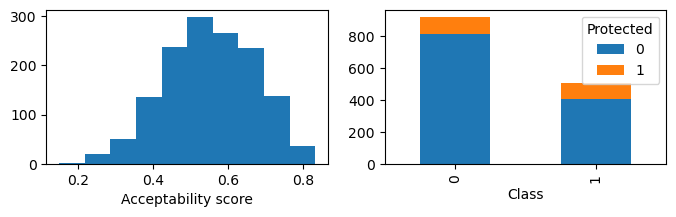

In [2]:
from codes.data_loader import load_data
import matplotlib.pyplot as plt

adj, data, W, s, y, prt = load_data(filename, class_attr, score_attr, prt_attr, score_norm = score_norm)
print('Min acceptability score = {:.4f}, Max acceptability score = {:.4f}'.format(np.min(s), np.max(s)))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,2))
ax1.hist(s)
ax1.set_xlabel('Acceptability score')

df = pd.DataFrame({'Class': y, 'Protected': prt}, dtype='int')
df.groupby(['Class', 'Protected']).size().unstack().plot(ax=ax2, kind='bar', stacked=True)

Total number of nodes = 1419
Number of isolated nodes = 479


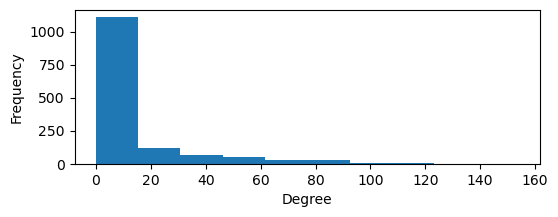

In [3]:
degrees = adj.sum(axis=1)
plt.figure(figsize=(6,2))
plt.hist(degrees)
plt.xlabel('Degree')
plt.ylabel('Frequency')

print('Total number of nodes =', degrees.shape[0])
print('Number of isolated nodes =', sum(degrees==0))

## Results for No Calibration

Results for No Calibration

  prec: 0.916039 |  Rank corr: 1.000000  | fp: 0.665962 | wsd: 0.000928 | wrd: 0.000019


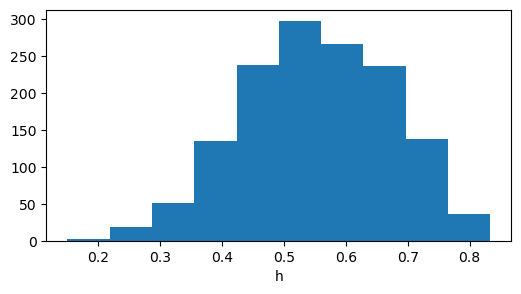

In [4]:
print('Results for No Calibration')
evaluate(s, y, s, prt, W, numBins = numBins, bin_width = bin_width)
out_df = pd.DataFrame({'h': s, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_Nocal.csv', index = False)

## Results for FPRank

In [5]:
results, params  = FPRank(W, s, y, prt, numBins = numBins, bin_width=bin_width)
out_df = pd.DataFrame(results)
out_df.to_csv(output_file + '_FPresults.csv', index=False)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  alpha=0.0100, beta=0.1000: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000930, wrd=0.000076
  alpha=0.0100, beta=0.1624: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000932, wrd=0.000077
  alpha=0.0100, beta=0.2637: prec=0.9295, corr=0.9971, fp=0.6596, wsd=0.000936, wrd=0.000077
  alpha=0.0100, beta=0.4281: prec=0.9295, corr=0.9971, fp=0.6575, wsd=0.000943, wrd=0.000082
  alpha=0.0100, beta=0.6952: prec=0.9292, corr=0.9969, fp=0.6575, wsd=0.000958, wrd=0.000086
  alpha=0.0100, beta=1.1288: prec=0.9287, corr=0.9961, fp=0.6547, wsd=0.000991, wrd=0.000119
  alpha=0.0100, beta=1.8330: prec=0.9256, corr=0.9912, fp=0.6441, wsd=0.001063, wrd=0.000266
  alpha=0.0100, beta=2.9764: prec=0.9150, corr=0.9754, fp=0.6251, wsd=0.001222, wrd=0.000698
  alpha=0.0100, beta=4.8329: prec=0.8877, corr=0.9335, fp=0.5927, wsd=0.001562, wrd=0.001870
  alpha=0.0100, beta=7.8476: prec=0.8221, corr=0.8405, fp=0.5462, wsd=0.002165, wrd=0.004457
  alpha=0.0100, beta=12.7427: prec=0.7585, corr=0.7497, fp=0.4996, wsd

 10%|████████▎                                                                          | 1/10 [00:46<06:57, 46.42s/it]

  alpha=0.0100, beta=1000.0000: prec=0.6498, corr=0.5953, fp=0.7724, wsd=0.002871, wrd=0.010741
  alpha=0.0278, beta=0.1000: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000929, wrd=0.000076
  alpha=0.0278, beta=0.1624: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000931, wrd=0.000076
  alpha=0.0278, beta=0.2637: prec=0.9295, corr=0.9971, fp=0.6596, wsd=0.000935, wrd=0.000077
  alpha=0.0278, beta=0.4281: prec=0.9295, corr=0.9971, fp=0.6575, wsd=0.000942, wrd=0.000082
  alpha=0.0278, beta=0.6952: prec=0.9292, corr=0.9969, fp=0.6575, wsd=0.000957, wrd=0.000086
  alpha=0.0278, beta=1.1288: prec=0.9287, corr=0.9961, fp=0.6547, wsd=0.000990, wrd=0.000119
  alpha=0.0278, beta=1.8330: prec=0.9256, corr=0.9912, fp=0.6441, wsd=0.001062, wrd=0.000266
  alpha=0.0278, beta=2.9764: prec=0.9150, corr=0.9754, fp=0.6251, wsd=0.001221, wrd=0.000698
  alpha=0.0278, beta=4.8329: prec=0.8876, corr=0.9335, fp=0.5927, wsd=0.001560, wrd=0.001870
  alpha=0.0278, beta=7.8476: prec=0.8221, corr=0.8405, fp=0.5462, w

 20%|████████████████▌                                                                  | 2/10 [01:34<06:16, 47.11s/it]

  alpha=0.0278, beta=1000.0000: prec=0.6497, corr=0.5964, fp=0.7837, wsd=0.002870, wrd=0.011300
  alpha=0.0774, beta=0.1000: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000927, wrd=0.000076
  alpha=0.0774, beta=0.1624: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000929, wrd=0.000076
  alpha=0.0774, beta=0.2637: prec=0.9295, corr=0.9971, fp=0.6596, wsd=0.000933, wrd=0.000077
  alpha=0.0774, beta=0.4281: prec=0.9295, corr=0.9971, fp=0.6575, wsd=0.000940, wrd=0.000081
  alpha=0.0774, beta=0.6952: prec=0.9292, corr=0.9969, fp=0.6575, wsd=0.000955, wrd=0.000086
  alpha=0.0774, beta=1.1288: prec=0.9287, corr=0.9961, fp=0.6547, wsd=0.000988, wrd=0.000118
  alpha=0.0774, beta=1.8330: prec=0.9256, corr=0.9912, fp=0.6441, wsd=0.001060, wrd=0.000266
  alpha=0.0774, beta=2.9764: prec=0.9150, corr=0.9754, fp=0.6251, wsd=0.001218, wrd=0.000698
  alpha=0.0774, beta=4.8329: prec=0.8876, corr=0.9335, fp=0.5927, wsd=0.001556, wrd=0.001868
  alpha=0.0774, beta=7.8476: prec=0.8221, corr=0.8406, fp=0.5462, w

 30%|████████████████████████▉                                                          | 3/10 [02:23<05:35, 47.98s/it]

  alpha=0.0774, beta=1000.0000: prec=0.6555, corr=0.6050, fp=0.5307, wsd=0.002867, wrd=0.009316
  alpha=0.2154, beta=0.1000: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000921, wrd=0.000075
  alpha=0.2154, beta=0.1624: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000923, wrd=0.000076
  alpha=0.2154, beta=0.2637: prec=0.9295, corr=0.9971, fp=0.6596, wsd=0.000927, wrd=0.000077
  alpha=0.2154, beta=0.4281: prec=0.9295, corr=0.9971, fp=0.6575, wsd=0.000934, wrd=0.000081
  alpha=0.2154, beta=0.6952: prec=0.9292, corr=0.9970, fp=0.6575, wsd=0.000949, wrd=0.000085
  alpha=0.2154, beta=1.1288: prec=0.9287, corr=0.9961, fp=0.6547, wsd=0.000982, wrd=0.000118
  alpha=0.2154, beta=1.8330: prec=0.9256, corr=0.9912, fp=0.6441, wsd=0.001053, wrd=0.000266
  alpha=0.2154, beta=2.9764: prec=0.9151, corr=0.9755, fp=0.6251, wsd=0.001209, wrd=0.000694
  alpha=0.2154, beta=4.8329: prec=0.8877, corr=0.9336, fp=0.5927, wsd=0.001544, wrd=0.001865
  alpha=0.2154, beta=7.8476: prec=0.8221, corr=0.8406, fp=0.5462, w

 40%|█████████████████████████████████▏                                                 | 4/10 [03:14<04:55, 49.29s/it]

  alpha=0.2154, beta=1000.0000: prec=0.6519, corr=0.5924, fp=0.7963, wsd=0.002859, wrd=0.013437
  alpha=0.5995, beta=0.1000: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000904, wrd=0.000073
  alpha=0.5995, beta=0.1624: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000906, wrd=0.000074
  alpha=0.5995, beta=0.2637: prec=0.9295, corr=0.9971, fp=0.6596, wsd=0.000910, wrd=0.000075
  alpha=0.5995, beta=0.4281: prec=0.9295, corr=0.9971, fp=0.6575, wsd=0.000918, wrd=0.000080
  alpha=0.5995, beta=0.6952: prec=0.9292, corr=0.9969, fp=0.6575, wsd=0.000933, wrd=0.000085
  alpha=0.5995, beta=1.1288: prec=0.9287, corr=0.9961, fp=0.6547, wsd=0.000965, wrd=0.000117
  alpha=0.5995, beta=1.8330: prec=0.9256, corr=0.9912, fp=0.6441, wsd=0.001034, wrd=0.000264
  alpha=0.5995, beta=2.9764: prec=0.9151, corr=0.9755, fp=0.6251, wsd=0.001186, wrd=0.000688
  alpha=0.5995, beta=4.8329: prec=0.8877, corr=0.9336, fp=0.5927, wsd=0.001512, wrd=0.001784
  alpha=0.5995, beta=7.8476: prec=0.8222, corr=0.8408, fp=0.5469, w

 50%|█████████████████████████████████████████▌                                         | 5/10 [04:06<04:11, 50.21s/it]

  alpha=0.5995, beta=1000.0000: prec=0.6528, corr=0.6001, fp=0.7794, wsd=0.002835, wrd=0.012955
  alpha=1.6681, beta=0.1000: prec=0.9296, corr=0.9971, fp=0.6631, wsd=0.000861, wrd=0.000070
  alpha=1.6681, beta=0.1624: prec=0.9296, corr=0.9971, fp=0.6631, wsd=0.000863, wrd=0.000071
  alpha=1.6681, beta=0.2637: prec=0.9295, corr=0.9971, fp=0.6596, wsd=0.000868, wrd=0.000073
  alpha=1.6681, beta=0.4281: prec=0.9295, corr=0.9971, fp=0.6575, wsd=0.000875, wrd=0.000078
  alpha=1.6681, beta=0.6952: prec=0.9292, corr=0.9969, fp=0.6575, wsd=0.000891, wrd=0.000081
  alpha=1.6681, beta=1.1288: prec=0.9287, corr=0.9961, fp=0.6554, wsd=0.000921, wrd=0.000114
  alpha=1.6681, beta=1.8330: prec=0.9256, corr=0.9912, fp=0.6441, wsd=0.000986, wrd=0.000257
  alpha=1.6681, beta=2.9764: prec=0.9152, corr=0.9756, fp=0.6258, wsd=0.001127, wrd=0.000672
  alpha=1.6681, beta=4.8329: prec=0.8878, corr=0.9338, fp=0.5927, wsd=0.001431, wrd=0.001740
  alpha=1.6681, beta=7.8476: prec=0.8224, corr=0.8411, fp=0.5469, w

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [04:57<03:22, 50.57s/it]

  alpha=1.6681, beta=1000.0000: prec=0.6570, corr=0.6040, fp=0.7900, wsd=0.002772, wrd=0.010269
  alpha=4.6416, beta=0.1000: prec=0.9295, corr=0.9971, fp=0.6638, wsd=0.000758, wrd=0.000060
  alpha=4.6416, beta=0.1624: prec=0.9295, corr=0.9971, fp=0.6638, wsd=0.000760, wrd=0.000063
  alpha=4.6416, beta=0.2637: prec=0.9295, corr=0.9971, fp=0.6596, wsd=0.000765, wrd=0.000065
  alpha=4.6416, beta=0.4281: prec=0.9295, corr=0.9971, fp=0.6575, wsd=0.000773, wrd=0.000073
  alpha=4.6416, beta=0.6952: prec=0.9292, corr=0.9970, fp=0.6568, wsd=0.000787, wrd=0.000077
  alpha=4.6416, beta=1.1288: prec=0.9287, corr=0.9961, fp=0.6554, wsd=0.000815, wrd=0.000105
  alpha=4.6416, beta=1.8330: prec=0.9257, corr=0.9913, fp=0.6441, wsd=0.000872, wrd=0.000230
  alpha=4.6416, beta=2.9764: prec=0.9154, corr=0.9758, fp=0.6258, wsd=0.000991, wrd=0.000624
  alpha=4.6416, beta=4.8329: prec=0.8881, corr=0.9344, fp=0.5934, wsd=0.001250, wrd=0.001613
  alpha=4.6416, beta=7.8476: prec=0.8231, corr=0.8426, fp=0.5476, w

 70%|██████████████████████████████████████████████████████████                         | 7/10 [05:49<02:33, 51.02s/it]

  alpha=4.6416, beta=1000.0000: prec=0.6498, corr=0.5944, fp=0.7808, wsd=0.002612, wrd=0.011357
  alpha=12.9155, beta=0.1000: prec=0.9296, corr=0.9971, fp=0.6638, wsd=0.000555, wrd=0.000043
  alpha=12.9155, beta=0.1624: prec=0.9295, corr=0.9971, fp=0.6631, wsd=0.000557, wrd=0.000054
  alpha=12.9155, beta=0.2637: prec=0.9295, corr=0.9971, fp=0.6603, wsd=0.000561, wrd=0.000056
  alpha=12.9155, beta=0.4281: prec=0.9295, corr=0.9971, fp=0.6582, wsd=0.000568, wrd=0.000061
  alpha=12.9155, beta=0.6952: prec=0.9292, corr=0.9970, fp=0.6568, wsd=0.000580, wrd=0.000064
  alpha=12.9155, beta=1.1288: prec=0.9287, corr=0.9961, fp=0.6554, wsd=0.000603, wrd=0.000087
  alpha=12.9155, beta=1.8330: prec=0.9258, corr=0.9915, fp=0.6434, wsd=0.000646, wrd=0.000191
  alpha=12.9155, beta=2.9764: prec=0.9158, corr=0.9763, fp=0.6258, wsd=0.000735, wrd=0.000500
  alpha=12.9155, beta=4.8329: prec=0.8891, corr=0.9358, fp=0.5941, wsd=0.000924, wrd=0.001370
  alpha=12.9155, beta=7.8476: prec=0.8253, corr=0.8456, fp

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [06:44<01:44, 52.36s/it]

  alpha=12.9155, beta=1000.0000: prec=0.6521, corr=0.5923, fp=0.5314, wsd=0.002259, wrd=0.009289
  alpha=35.9381, beta=0.1000: prec=0.9299, corr=0.9971, fp=0.6631, wsd=0.000284, wrd=0.000048
  alpha=35.9381, beta=0.1624: prec=0.9298, corr=0.9971, fp=0.6631, wsd=0.000286, wrd=0.000033
  alpha=35.9381, beta=0.2637: prec=0.9296, corr=0.9971, fp=0.6603, wsd=0.000288, wrd=0.000033
  alpha=35.9381, beta=0.4281: prec=0.9296, corr=0.9971, fp=0.6582, wsd=0.000292, wrd=0.000044
  alpha=35.9381, beta=0.6952: prec=0.9294, corr=0.9970, fp=0.6575, wsd=0.000300, wrd=0.000048
  alpha=35.9381, beta=1.1288: prec=0.9289, corr=0.9962, fp=0.6561, wsd=0.000314, wrd=0.000053
  alpha=35.9381, beta=1.8330: prec=0.9263, corr=0.9917, fp=0.6434, wsd=0.000340, wrd=0.000129
  alpha=35.9381, beta=2.9764: prec=0.9166, corr=0.9772, fp=0.6265, wsd=0.000395, wrd=0.000350
  alpha=35.9381, beta=4.8329: prec=0.8910, corr=0.9383, fp=0.5969, wsd=0.000509, wrd=0.000963
  alpha=35.9381, beta=7.8476: prec=0.8299, corr=0.8514, f

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [07:32<00:50, 50.86s/it]

  alpha=35.9381, beta=1000.0000: prec=0.6542, corr=0.5970, fp=0.7681, wsd=0.001670, wrd=0.012826
  alpha=100.0000, beta=0.1000: prec=0.9303, corr=0.9971, fp=0.6631, wsd=0.000089, wrd=0.000072
  alpha=100.0000, beta=0.1624: prec=0.9301, corr=0.9971, fp=0.6617, wsd=0.000090, wrd=0.000050
  alpha=100.0000, beta=0.2637: prec=0.9299, corr=0.9971, fp=0.6603, wsd=0.000091, wrd=0.000029
  alpha=100.0000, beta=0.4281: prec=0.9298, corr=0.9971, fp=0.6582, wsd=0.000092, wrd=0.000019
  alpha=100.0000, beta=0.6952: prec=0.9296, corr=0.9970, fp=0.6575, wsd=0.000095, wrd=0.000027
  alpha=100.0000, beta=1.1288: prec=0.9292, corr=0.9962, fp=0.6561, wsd=0.000101, wrd=0.000030
  alpha=100.0000, beta=1.8330: prec=0.9267, corr=0.9922, fp=0.6441, wsd=0.000112, wrd=0.000054
  alpha=100.0000, beta=2.9764: prec=0.9176, corr=0.9782, fp=0.6279, wsd=0.000136, wrd=0.000149
  alpha=100.0000, beta=4.8329: prec=0.8933, corr=0.9415, fp=0.5990, wsd=0.000191, wrd=0.000529
  alpha=100.0000, beta=7.8476: prec=0.8369, corr

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [08:17<00:00, 49.79s/it]

  alpha=100.0000, beta=1000.0000: prec=0.6534, corr=0.5988, fp=0.7442, wsd=0.000991, wrd=0.011940


Range of evaluation measures:
   Precision: 0.6443451164715379 0.9302836124638308
   Fairness perception: 0.41367159971811135 0.8054968287526427
   WSD: 0.003121063876555312 8.916743111509278e-05
   WRD: 0.01597585220666143 1.9243892933234913e-05

Best parameters: alpha = 12.9155, beta = 0.1000 (util = 0.9131)

Result for FPRank:

  prec: 0.929607 |  Rank corr: 0.997124  | fp: 0.663848 | wsd: 0.000555 | wrd: 0.000043


{'precision': 0.9296068673554091,
 'corr': 0.9971238353098972,
 'fairperception': 0.6638477801268499,
 'wsd': 0.0005551453197808603,
 'wrd': 4.328023829577965e-05}

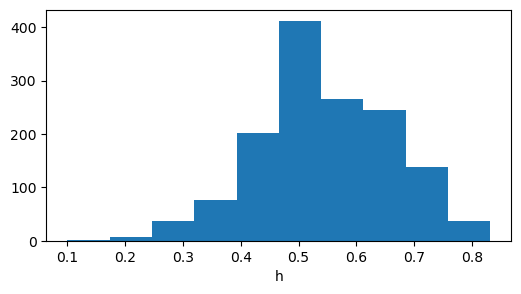

In [6]:
print('Range of evaluation measures:')
print('   Precision:', np.min(results['precision']), np.max(results['precision']))
print('   Fairness perception:', np.min(results['fairperception']), np.max(results['fairperception']))
print('   WSD:', np.max(results['wsd']), np.min(results['wsd']))
print('   WRD:', np.max(results['wrd']), np.min(results['wrd']))

h, bestparam, utils = best_FPRank(results, params)
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FPRank.csv', index = False)
print('\nResult for FPRank:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for InFoRM

Require InFoRM package that can be downloaded from https://github.com/jiank2/inform

In [7]:
from InFoRM import utils
from InFoRM.method.debias_model import DebiasModel
from scipy.sparse import csc_matrix

def debias_mining_model(adj, s, alpha=0., metric='cosine'):
    # init params
    c = 0.85

    sp_adj = csc_matrix(adj)
    adj = utils.symmetric_normalize(sp_adj)
    
    # build similarity matrix
    sim = utils.filter_similarity_matrix(utils.get_similarity_matrix(adj, metric=metric), sigma=0.75)
    sim = utils.symmetric_normalize(sim)

    # debias pagerank
    FairModel = DebiasModel()
    
    personalization = s.reshape(-1,1)
    personalization = personalization/personalization.sum()
    
    r = FairModel.pagerank(adj, sim, alpha, c=c, personalization=personalization)
    r = np.array([list(r.values())])
    r = csc_matrix(np.array(r).transpose())

    return r


  prec: 0.517475 |  Rank corr: 0.395697  | fp: 0.544045 | wsd: 0.000000 | wrd: 0.019734


{'precision': 0.517475290461908,
 'corr': 0.3956969277409142,
 'fairperception': 0.5440451021846371,
 'wsd': 2.2395200680514102e-08,
 'wrd': 0.019733703780682454}

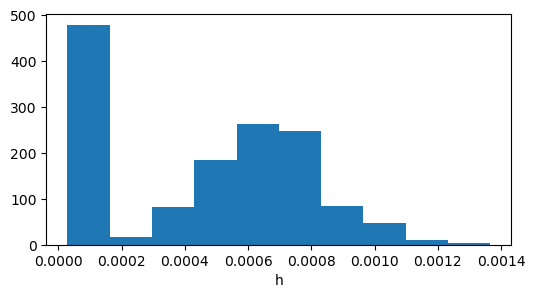

In [8]:
h = debias_mining_model(adj, s).toarray().flatten()
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_INFORM.csv', index = False)
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FSPR

     pcost       dcost       gap    pres   dres
 0: -7.6862e+01 -1.9210e+03  9e+03  2e+00  2e-15
 1: -2.1245e+01 -7.0375e+02  9e+02  9e-02  8e-16
 2: -1.5123e+00 -2.7227e+01  3e+01  3e-03  1e-15
 3: -1.0332e+00 -2.3960e+00  1e+00  3e-05  1e-15
 4: -1.0867e+00 -1.7826e+00  7e-01  1e-05  7e-16
 5: -1.1116e+00 -1.7988e+00  7e-01  1e-05  7e-16
 6: -1.2485e+00 -1.4712e+00  2e-01  3e-07  6e-16
 7: -1.2840e+00 -1.4902e+00  2e-01  1e-07  4e-16
 8: -1.3139e+00 -1.3995e+00  9e-02  5e-08  4e-16
 9: -1.3143e+00 -1.3855e+00  7e-02  2e-16  4e-16
10: -1.3402e+00 -1.3468e+00  7e-03  1e-15  5e-16
11: -1.3427e+00 -1.3429e+00  3e-04  4e-16  4e-16
12: -1.3428e+00 -1.3428e+00  3e-06  9e-16  4e-16
13: -1.3428e+00 -1.3428e+00  3e-08  9e-16  4e-16
Optimal solution found.

  prec: 0.727049 |  Rank corr: 0.601812  | fp: 0.584919 | wsd: 0.000001 | wrd: 0.021194


{'precision': 0.7270491649978504,
 'corr': 0.6018123584401615,
 'fairperception': 0.5849189570119803,
 'wsd': 6.107370785232707e-07,
 'wrd': 0.02119420902223222}

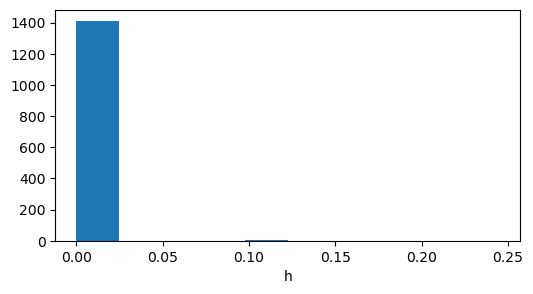

In [9]:
h = FSPR_model(adj, s, prt)
out_df = pd.DataFrame({'h': h.ravel(), prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FSPR.csv', index = False)
evaluate(h.ravel(), y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FairTopk

Require fairsearchcore library from https://github.com/fair-search/fairsearch-fair-python

D:\Anaconda\envs\fprank\lib\site-packages\fairsearchcore\fair.py:165: UserWarning: Library has not been tested with values outside this range
  warnings.warn("Library has not been tested with values outside this range")


Result for FairTopK:

  prec: 0.863005 |  Rank corr: 0.840707  | fp: 0.659619 | wsd: 0.012358 | wrd: 0.009324


{'precision': 0.8630048428708618,
 'corr': 0.8407071297245287,
 'fairperception': 0.6596194503171248,
 'wsd': 0.012358115219994296,
 'wrd': 0.009323586938623821}

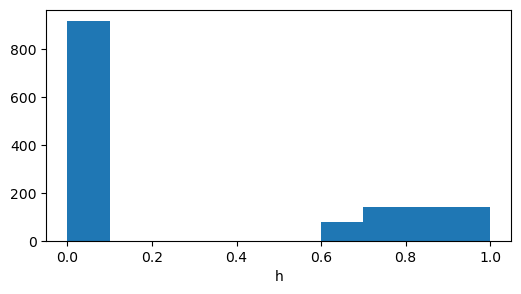

In [10]:
from codes.data_loader import load_data_fairtopk

rankings, k, p, data = load_data_fairtopk(filename, class_attr, score_attr, prt_attr, factor=1)

alpha = 0.1
fair = fsc.Fair(k, p, alpha)
re_ranked = fair.re_rank(rankings)
eps = 1/len(rankings)
h = np.zeros(len(rankings))
for i,item in enumerate(re_ranked):
    h[item.id] = 1 - i*eps
out_df = pd.DataFrame({'h': h, prt_attr : data[prt_attr]})
out_df.to_csv(output_file + '_FairTopk.csv', index = False)

print('Result for FairTopK:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)